In [30]:
# O zoo fornece recurso para series temporais
require(zoo)

# dataframe de alto desempenho do R
library(data.table)

# forçar o fundo branco
library(ggplot2)

#### Limpeza dos dados

* dados ausentes
* upsamping e dowsampling
* suavização dos dados
* lidar com sazonalidade dos dados
* prevenir lookaheads não intencionais

Dados ausente em series temporais são bem comuns pois a carga longitudinal é bastante pesada, para lidar com isso se tem alguns metodos:
1. `Imputing`
2. `interpolação`: usa pontos vizinhos para lidar com valores ausentes
3. `Exclusão de dados`

In [31]:

path_ = "C:\\Users\\mateu\\Documents\\MEGA\\Projetos-git\\analise-pratica-series-temporais_predicao-stats-ml\\capitulo-2-encontrando-dados-e-usando-data-wrangling-com-st\\dataset\\gov\\UNRATE.csv"
# Lendo arquivo 
unemp = fread(input = path_ )

In [32]:
head(unemp, n=5)

DATE,UNRATE
<IDate>,<dbl>
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [33]:
# convertendo para tipo data
unemp[, DATE:=as.Date(DATE)]

setkey(unemp, DATE)

In [34]:
head(x=unemp, n=5)

DATE,UNRATE
<date>,<dbl>
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [35]:
## Gera um conj. de dados onde os dados estão aleatoriamente
### ausentes
rand.unemp.idx = sample(
    1:nrow(unemp), .1*nrow(unemp)
)
rand.unemp.idx

[1] 577 831 366 457  18 133 284 440   2 364 574 184 773 536 659 384 413 689 279
[20] 484 446  63  65 710 478 132 572 660 653 802 346 157 754 633 363 123 160 492
[39] 238 356 454 235 820 272 541 117 173 482 382 729 494 812 731 809 601 237 326
[58] 692 131 179 113 151 432 587 227 330 378 447 277  76 161 395 755 609 595 369
[77]  38 137 380 241 254 695 509 288

In [36]:
rand.unemp = unemp[-rand.unemp.idx]
head(rand.unemp, n=10)

DATE,UNRATE
<date>,<dbl>
1948-01-01,3.4
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
1948-06-01,3.6
1948-07-01,3.6
1948-08-01,3.9
1948-09-01,3.8
1948-10-01,3.7


In [37]:
## Gera um conj. de dados onde os dados possuem maior
### probalidade de ausencia quando o desemprego é alto

alto.unemp.idx = which(unemp$UNRATE>8)
num.to.select  = .2*length(alto.unemp.idx)

alto.unemp.idx = sample(alto.unemp.idx, )

bias.unemp = unemp[-alto.unemp.idx]

In [38]:
which(bias.unemp$UNRATE>8)

integer(0)

Usando rolling join para ler valores ausentes

In [39]:
all.dates = seq(from = unemp$DATE[1], to = tail(unemp$DATE, 1), by='months')

In [40]:
rand.unemp = rand.unemp[J(all.dates), on='DATE', roll=0]
bias.unemp = rand.unemp[J(all.dates), on='DATE', roll=0]

In [41]:
rand.unemp[, rpt := is.na(UNRATE)]

In [42]:
head(rand.unemp[rand.unemp$rpt==TRUE], 2)

DATE,UNRATE,rpt
<date>,<dbl>,<lgl>
1948-02-01,NA,TRUE
1949-06-01,NA,TRUE


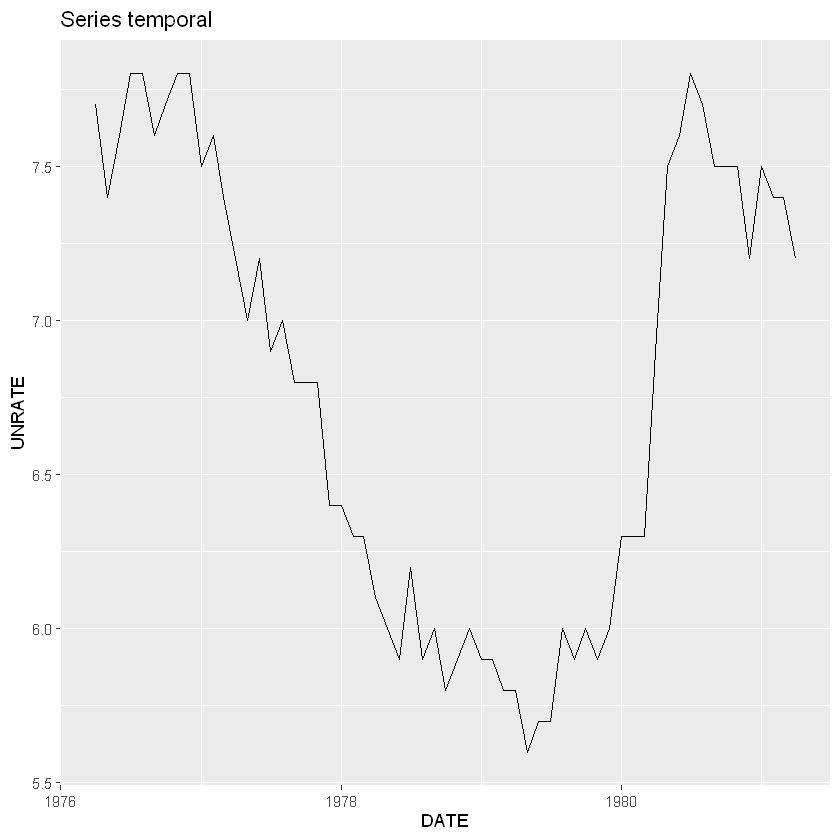

In [45]:
ggplot(
    unemp[340:400], aes(x=DATE, y=UNRATE) ) + 
    geom_line() + 
    labs(title = 'Series temporal') 